#  The Spark Foundation - Data Science & Business Analytics Internship

# Name : Anjali Gupta

# Task 2- Prediction using Unsupervised Machine Learning ( Beginner)

# GRIPMARCH23

### Problem Statement:Prediction using Unsupervised Machine Learning.
### ●	From the given dataset, predict the optimum number of clusters and represent it visually.

In [38]:
#Loading all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

### Read dataset and basic details of dataset
### Goal:-In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.
### In this stage we are going to read our problem dataset and have a look on it.

In [39]:
#loading training data
try:
    df = pd.read_csv('Iris.csv')
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")

Data read done successfully...


In [40]:
#check loading Data
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [41]:
#get five raws
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


After we read the data, we can look at the data using: There are multiple variables in the dataset – (Id, SepalLengthCm, SepalWidthCm,	PetalLengthCm, PetalWidthCm, Species)

Id column is not a real feature of our flowers. I will drop it

In [42]:
df.drop(["Id"],axis=1,inplace=True)    # dropped

df.tail()   # last 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [43]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 150 rows and 5 columns


In [44]:
#Get summerization information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


with the info function will get to know that we have non null values to whole dataset and we have total 2 types of data types in dataset which is, numerical(int and float) and object

### Descriptive Analysis

In [45]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### Null and Nan values

•Null Values

In [46]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

as we notice that there are no null values in our dataset.

•Nan values

In [29]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

as we notice that there are no nan (Not a number) values in our dataset.

### K-means classification

I will simply do not use labels column on my "new" Dataset

In [47]:
features = df.iloc[:, [0, 1, 2, 3]].values

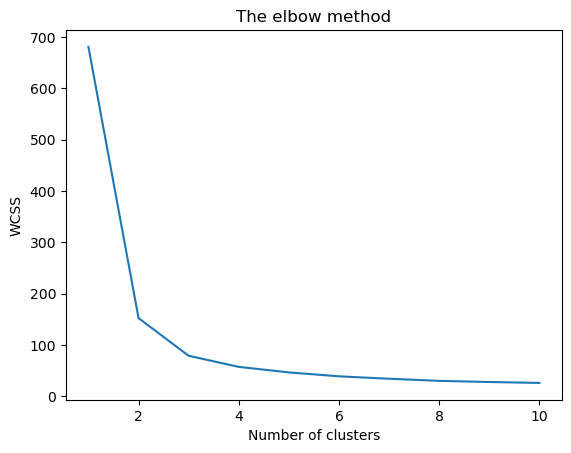

In [48]:
# Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [49]:
#  Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)



The fit predict method is used that returns for each observation which cluster it belongs to. The cluster to which client belongs and it will return this cluster numbers into a single vector that is called y_kmeans

In [50]:
y_kmeans = kmeans.fit_predict(features)

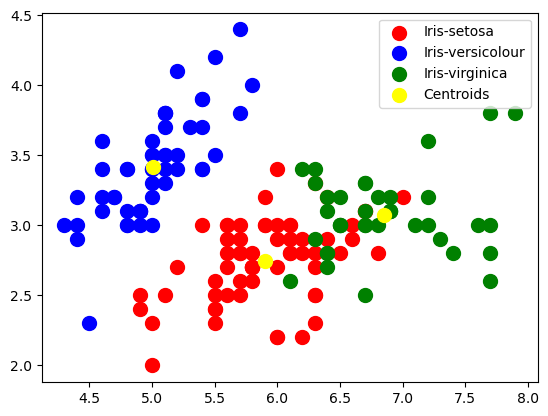

In [51]:
# Visualising the clusters - On the first two columns
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()